In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np
import glob

## Loading dataset

In [2]:
files = glob.glob('abolqasemi dataset/S*')
mats = []
titles = []
for dir in files:
    s = sio.loadmat(dir)
    if len(s['su']) != 0:
        mats.append(s['su'][0][0])
        titles.append(dir.split('\\')[-1])

mats = np.array(mats)
locs = sio.loadmat('abolqasemi dataset/cond.mat')['Cond'].reshape(-1)

## Raster plots

8it [00:40,  5.01s/it]


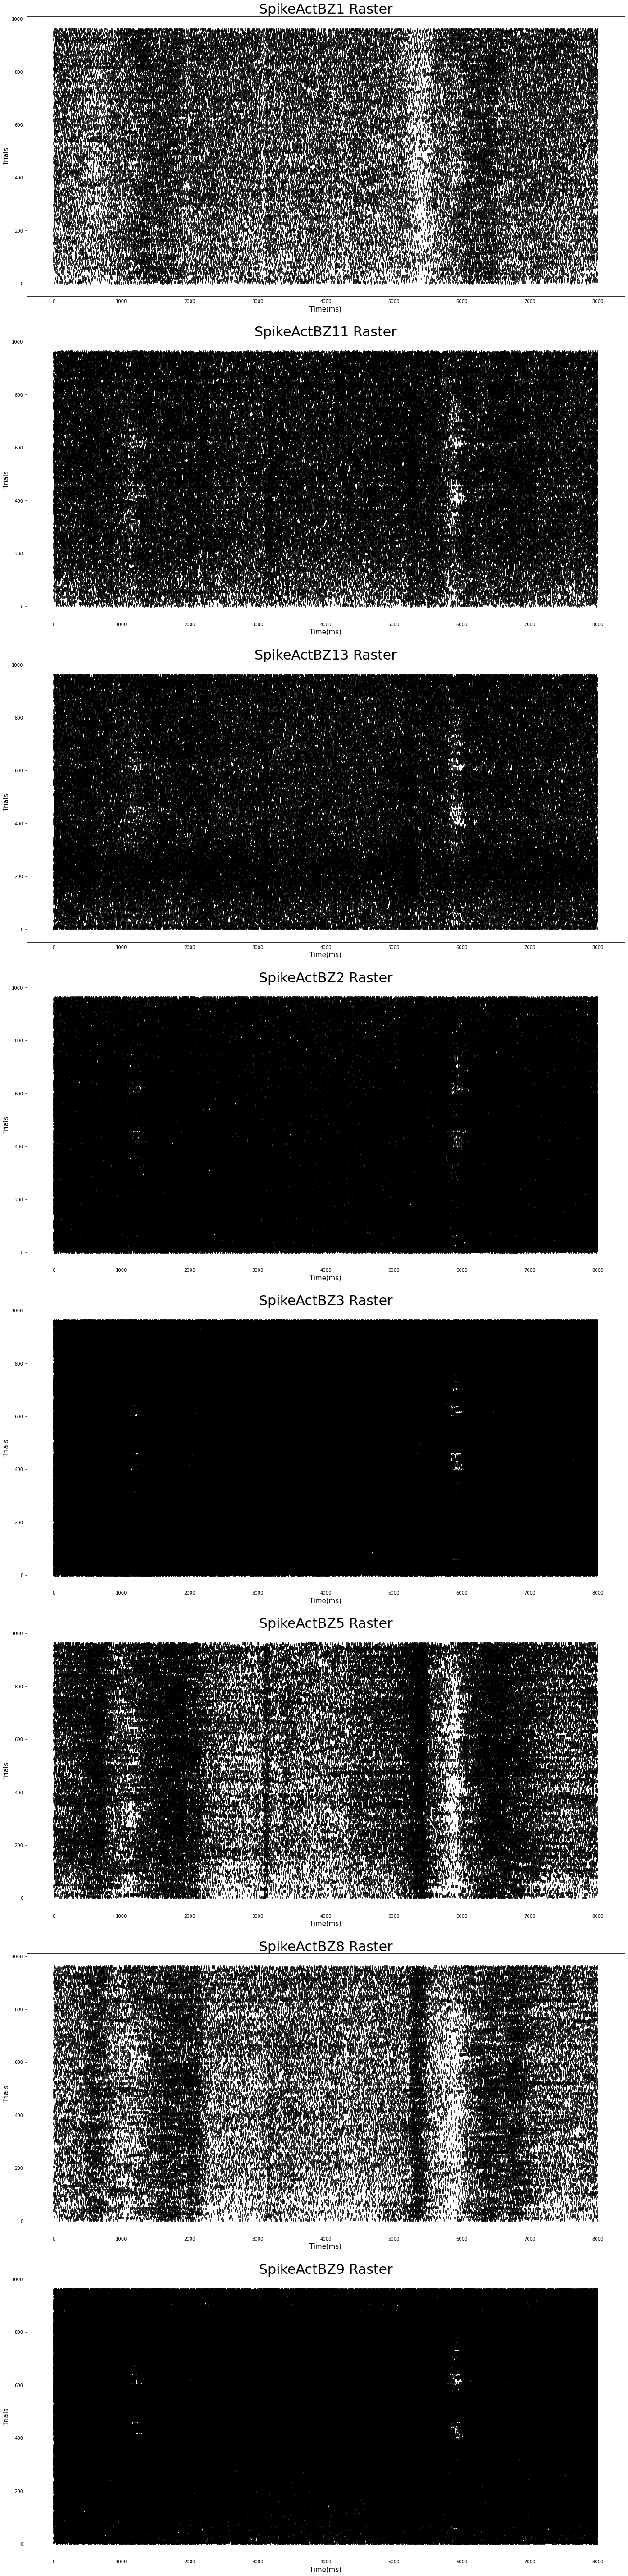

In [3]:
fig, axs = plt.subplots(8,1, figsize=(20,80))
for n, neuron in tqdm(enumerate(mats)):
    for trial in range(963):
        X = np.where(neuron[trial]==1)[0]
        Y = np.ones(X.shape)*trial
        ax = axs.flat[n]
        ax.scatter(x=X, y=Y, marker='|', c='k')
        ax.set_title(titles[n][:-4]+' Raster', fontsize=30)
        ax.set_xlabel('Time(ms)', fontsize=15)
        ax.set_ylabel('Trials', fontsize=15)
        
plt.tight_layout(pad=3)

## PSTH

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:03<00:00,  2.46it/s]


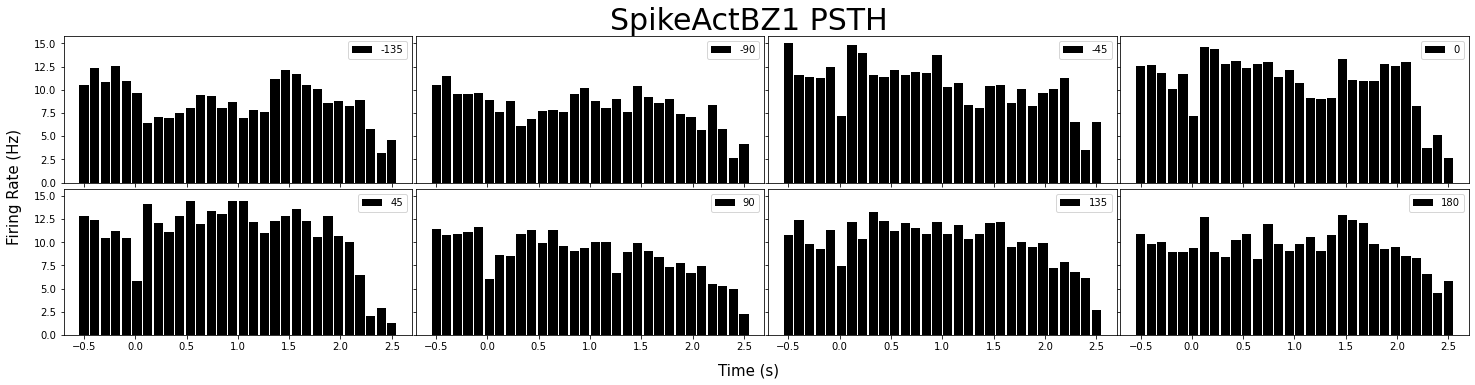

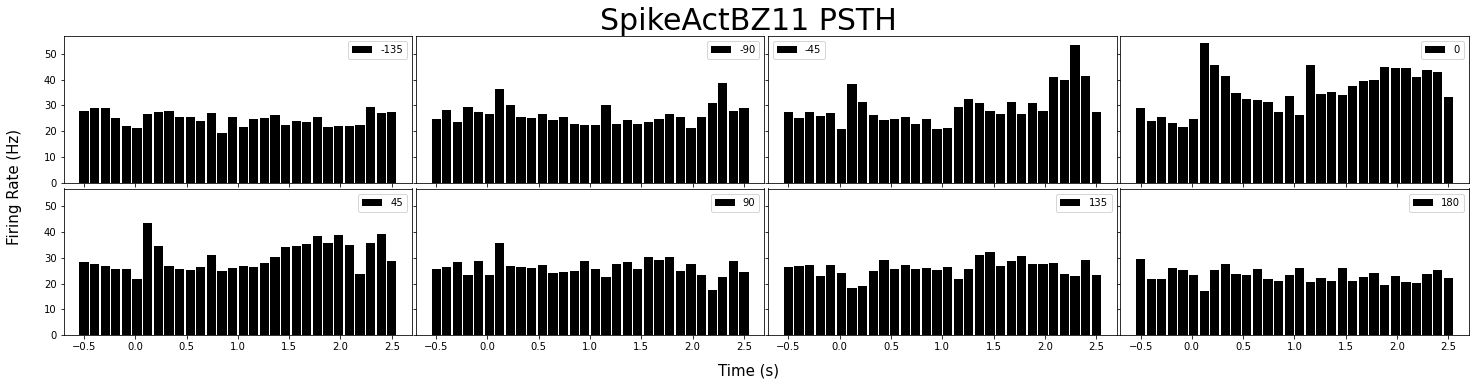

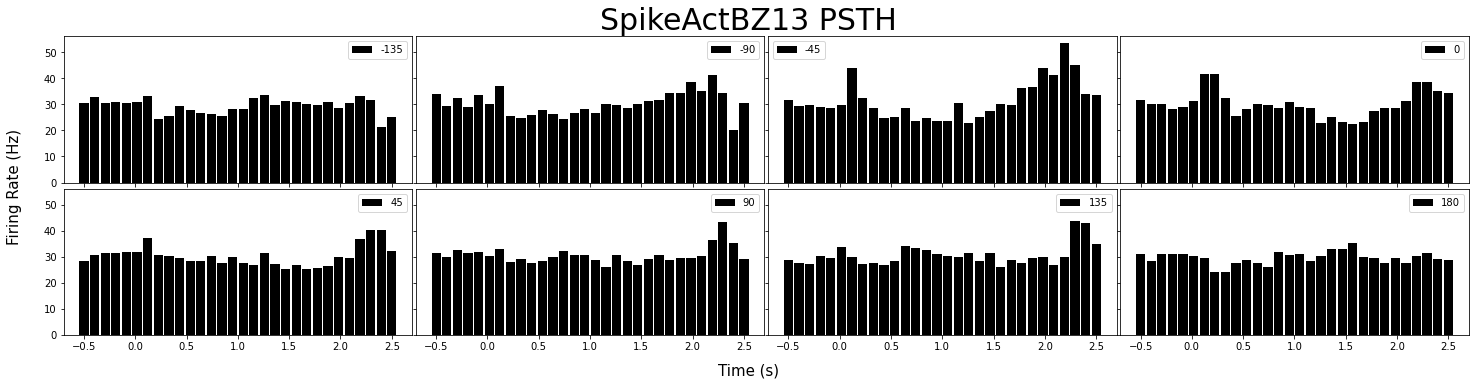

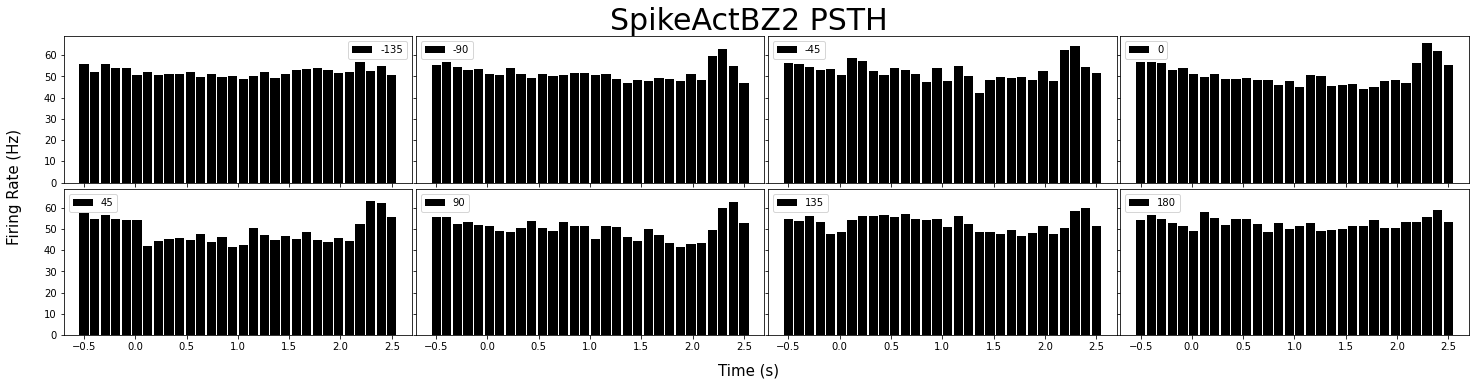

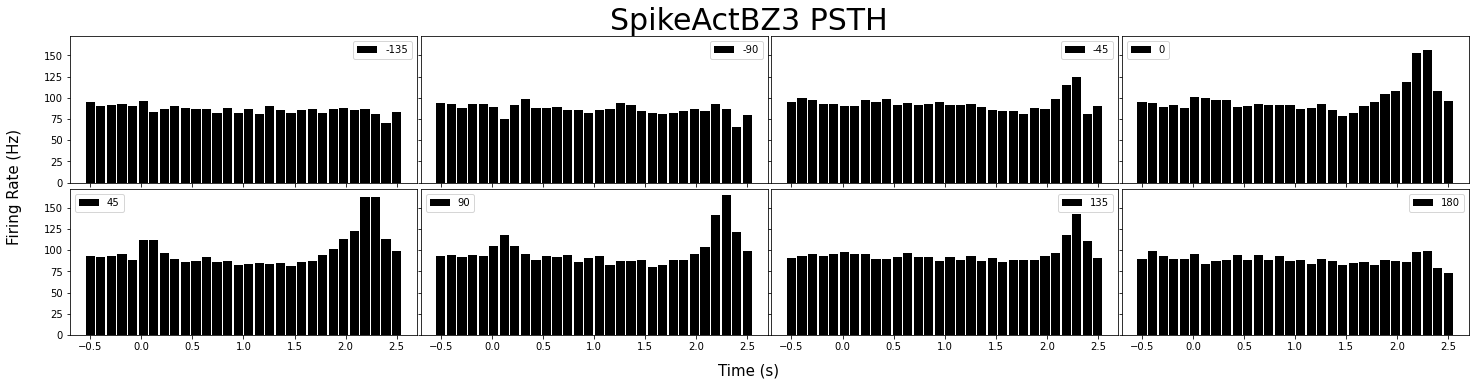

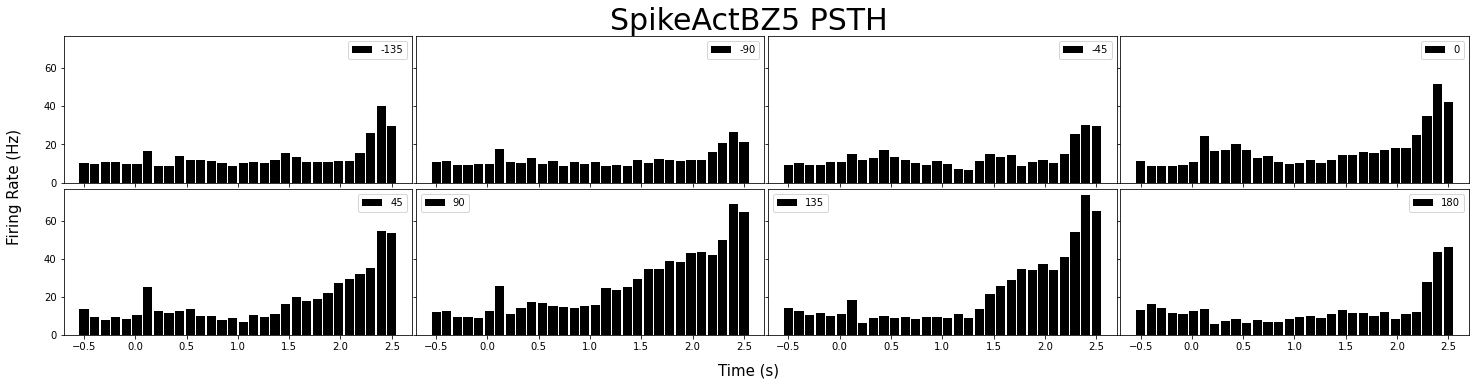

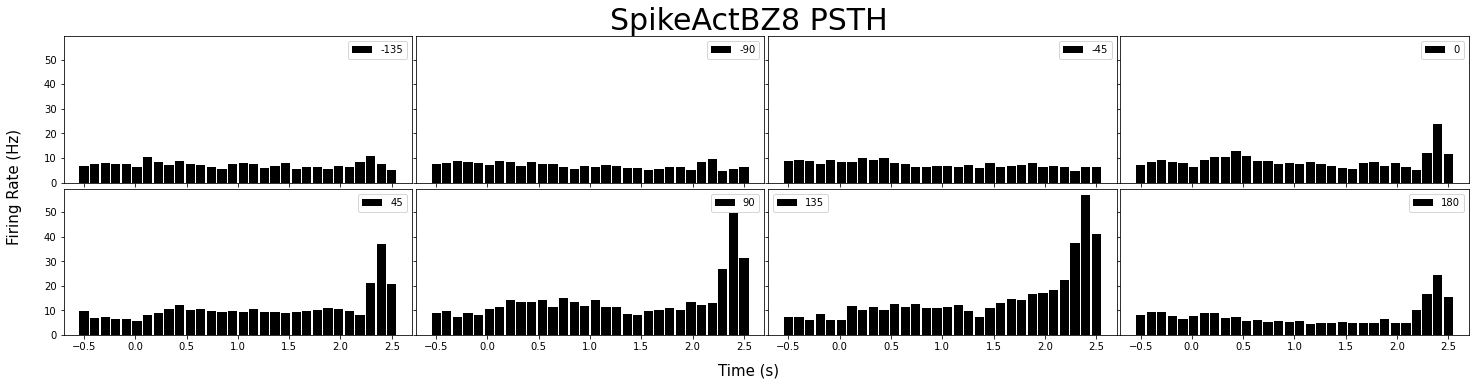

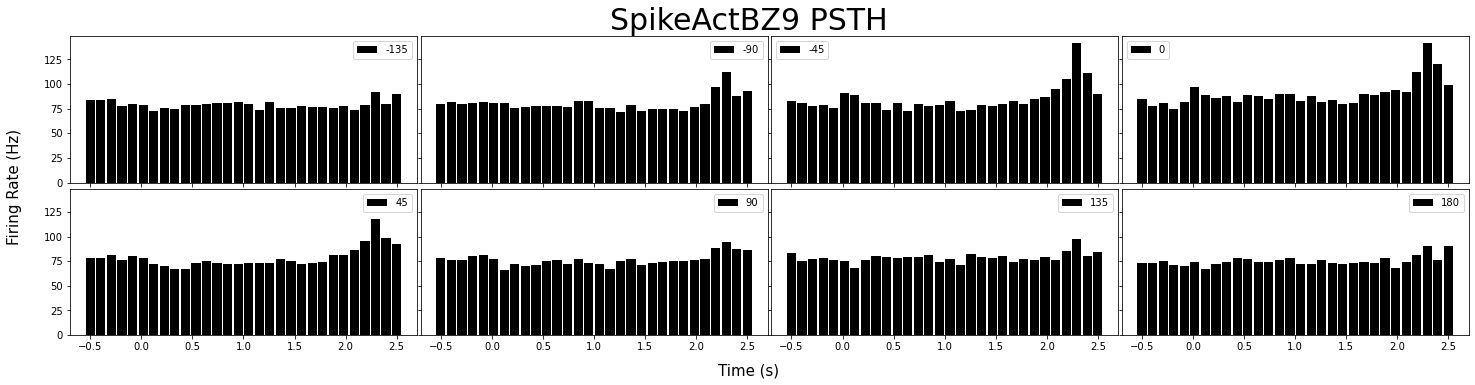

In [13]:
nbins   = 30               # number of bins    
slength = 3000             # signal length
bdur    = slength//nbins   # bin duration
angles = [-135, -90, -45, 0, 45, 90, 135, 180]

for neuron in tqdm(range(8)):
    fig, axs = plt.subplots(2,4, figsize=(20,5), sharex=True, sharey=True)
    for angle in range(8):
        s = mats[neuron,np.where((locs == angle+1) | (locs == angle+9))[0],2500:5500]
        bars = []
        for x in np.arange(0,s.shape[-1],bdur):
            bars.append(np.mean(s[:,x:x+bdur])*1000)
        ax = axs.flat[angle]
        ax.bar(np.linspace(-0.5,2.5,nbins), bars, width=0.09, color='k', label=angles[angle])
        ax.legend()
    fig.supxlabel('Time (s)', fontsize=15, y=-0.03)
    fig.supylabel('Firing Rate (Hz)', fontsize=15, x=-0.015)
    plt.suptitle(titles[neuron][:-4]+' PSTH', fontsize=30, y=1)
    plt.tight_layout(pad=0)
    

## Firing Rate

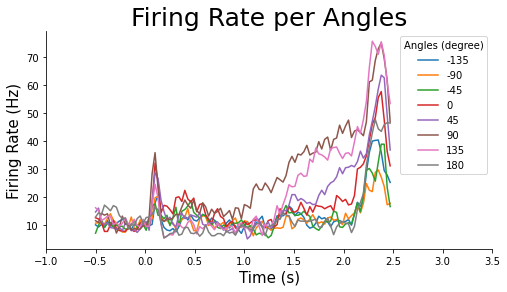

In [5]:
nbins   = 60               # number of bins    
slength = 3000             # signal length
bdur    = slength//nbins   # bin duration
stride  = 30
angles = [-135, -90, -45, 0, 45, 90, 135, 180]
m = mats[-3].squeeze()

plt.figure(figsize=(8,4))
for i in range(8):
    x = m[np.where((locs == i+1) | (locs == i+9))[0],2500:5500]
    Y = []
    for j in np.arange(0,x.shape[-1],stride):
        Y.append(np.mean(x[:,j:j+bdur])*1000)
    plt.plot(np.arange(-0.5,2.5,stride/1000), Y, label=angles[i])

plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Firing Rate (Hz)', fontsize=15)
plt.title('Firing Rate per Angles', fontsize=25)
plt.xlim((-1,3.5))
plt.legend(loc=1, title='Angles (degree)')
sns.despine()
plt.show()

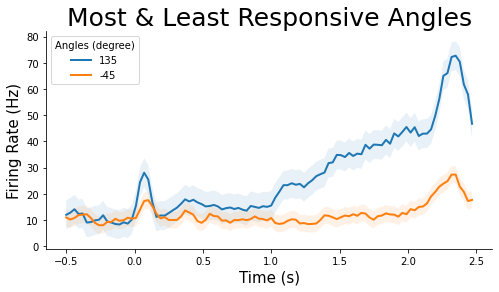

In [22]:
plt.figure(figsize=(8,4))
FRs = []
for i in [6,2]:
    x = m[np.where((locs == i) | (locs == i+8))[0],2500:5500]
    Y = np.zeros((x.shape[-1]//stride, x.shape[0]))
    for n, j in enumerate(np.arange(0,x.shape[-1],stride)):
        Y[n,:] = np.mean(x[:,j:j+bdur], axis=1)*1000
    
    X = np.arange(-0.5,2.5,stride/1000)
    ci = 1.96 * np.std(Y)/np.sqrt(len(X))
    Y = np.mean(Y, 1)
    FRs.append(Y)
    plt.plot(X, Y, linewidth=2, label=angles[i])
    plt.fill_between(X, (Y-ci), (Y+ci), alpha=.1)

plt.xlabel('Time (s)', fontsize=15)
plt.ylabel('Firing Rate (Hz)', fontsize=15)
plt.title('Most & Least Responsive Angles', fontsize=25)
# plt.xlim((-1,3.5))
plt.legend(title='Angles (degree)')
sns.despine()
plt.show()

In [23]:
from scipy import stats
t_statistic, p_value = stats.ttest_rel(FRs[0], FRs[1])

print('P-Value is:', p_value, '< 0.05')
print('So there is a statistically significant difference between firing rate of two selected angles.')

P-Value is: 3.6533427898333026e-18 < 0.05
So there is a statistically significant difference between firing rate of two selected angles.


---
---